# TODO
- ALT QUESTION: which LR differences are predictive of age?
- get errors (dispersion) instead of correlation
- inspect >1 correlations

# NOTES


In [1]:
%load_ext autoreload
%autoreload 2
import warnings; warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
from vacou import *
from plots import *
import regtest.regtest as rt

from sklearn.metrics.pairwise import pairwise_distances

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
sns.set(font="monospace")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data_fp = '/P/vacou/data/SS31_gait_data_for_PCA.tsv'
sep_runs_data_fp = '/P/vacou/data/all_separate_runs.csv'
#d_orig = pd.read_csv(data_fp, sep='\t')
response_column = 'Group'

In [3]:
d, md, full_df = preprocess_vc(version = 5, data_fp=data_fp, use_vars_fp='data/use_variables.csv')

In [4]:
md.groupby('Group').apply(lambda x: x.shape[0])

Group
A    30
Y    15
dtype: int64

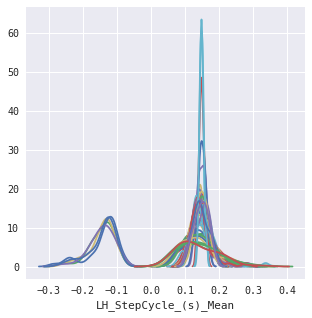

In [5]:
d = normalize_pd(d, axis=0)
#d = scale_pd(d, axis=0, how="scale")

fig, ax = plt.subplots(figsize=(5,5))
for c in d:
    sns.distplot(d[c], hist=False)

In [6]:
d.index.get_level_values(2)

Index(['1.1', '1.2', '1.3', '1.4', '3.2', '3.3', '3.4', '4.1', '4.2', '4.3',
       '4.4', '5.1', '5.2', '5.3', '5.4', '1.1', '1.2', '1.3', '1.4', '2.1',
       '2.2', '2.3.', '2.4', '3.1', '3.2', '1.1', '1.2', '1.3', '1.4', '2.1',
       '2.2', '2.3', '2.4', '3.1', '3.2', '3.3', '3.4', '4.1', '4.2', '4.3',
       '4.4', '5.1', '5.2', '5.3', '5.4'],
      dtype='object', name='Animal')

In [7]:
#sd, smd, sfull_df = preprocess_vc(sep_runs_data_fp, version = 3, use_vars_fp='data/use_variables.csv')

# Left side - right side relationships - 'laterality'
Values in the table are correlations between each left-side gait parameter and the corresponding right-seid gait parameter. Lowest correlations are sorted first.

In [8]:
corrs = corr_L_R(full_df)
#corrs.groupby(corrs.index.get_level_values(0)).apply(lambda x: x.sort_values('correlation', ascending=True))
#corrs.sort_values('correlation', ascending=True).head(10)

KeyError: "['PhaseDispersions_LF->LH_Mean_delta'] not in index"

In [9]:
corrs.sort_values('correlation', ascending=True).tail(10)

NameError: name 'corrs' is not defined

In [10]:
corrs.groupby('group').apply(lambda x: x.sort_values('correlation', ascending=True).head())\
        .drop('group',1)

NameError: name 'corrs' is not defined

### Plot 

In [11]:
d.head()

FP_StepCycle_(s)_Mean  RF_StandIndex_Mean  \
Group Group_old Animal                                              
Y     YC        1.1                  0.140890           -0.187346   
                1.2                  0.125123           -0.167358   
                1.3                  0.114869           -0.185670   
                1.4                  0.131087           -0.168839   
                3.2                  0.112037           -0.170307   

                        LF_StrideLength_(cm)_Mean  LH_BodySpeed_(cm/s)_Mean  \
Group Group_old Animal                                                        
Y     YC        1.1                      0.138821                  0.140752   
                1.2                      0.139167                  0.149613   
                1.3                      0.150345                  0.192035   
                1.4                      0.128732                  0.138975   
                3.2                      0.130965                  0.151610   

                        FP_SwingSpeed_(cm/s)_Mean  FP_Swing_(s)_Mean  \
Group Group_old Animal                                                 
Y     YC        1.1                      0.146431           0.156994   
                1.2                      0.152358           0.131714   
                1.3                      0.182065           0.122192   
                1.4                      0.150660           0.115179   
                3.2                      0.163093           0.112905   

                        RH_StepCycle_(s)_Mean  RH_BodySpeedVariation_(%)_Mean  \
Group Group_old Animal                                                          
Y     YC        1.1                  0.134463                        0.126803   
                1.2                  0.130713                        0.145014   
                1.3                  0.112758                        0.125027   
                1.4                  0.124878                        0.117724   
                3.2                  0.109259                        0.108125   

                        RF_InitialDualStance_(s)_Mean  \
Group Group_old Animal                                  
Y     YC        1.1                          0.103525   
                1.2                          0.103948   
                1.3                          0.089976   
                1.4                          0.158647   
                3.2                          0.124741   

                        LH_MaxContactAt_(%)_Mean          ...            \
Group Group_old Animal                                    ...             
Y     YC        1.1                     0.138623          ...             
                1.2                     0.184829          ...             
                1.3                     0.096172          ...             
                1.4                     0.153493          ...             
                3.2                     0.122842          ...             

                        FP_StandIndex_Mean  RF_TerminalDualStance_(s)_Mean  \
Group Group_old Animal                                                       
Y     YC        1.1              -0.170126                        0.155267   
                1.2              -0.164700                        0.072534   
                1.3              -0.189042                        0.089630   
                1.4              -0.142941                        0.201443   
                3.2              -0.229082                        0.101477   

                        RH_BodySpeed_(cm/s)_Mean  FP_Stand_(s)_Mean  \
Group Group_old Animal                                                
Y     YC        1.1                     0.141036           0.126309   
                1.2                     0.150448           0.118071   
                1.3                     0.188648           0.107266   
                1.4                     0.137768           0.140071   
              

In [12]:
d_plot = plot_L_R(d)

In [13]:
d_plot.head()

,Group,parameter,Animal,L,R
0,A,F_BodySpeedVariation_(%)_Mean,1.1,0.306142,0.332609
1,A,F_BodySpeedVariation_(%)_Mean,1.2,0.371541,0.388729
2,A,F_BodySpeedVariation_(%)_Mean,1.3,0.256073,0.256182
3,A,F_BodySpeedVariation_(%)_Mean,1.4,0.253214,0.257068
4,A,F_BodySpeedVariation_(%)_Mean,2.1,0.320265,0.316345


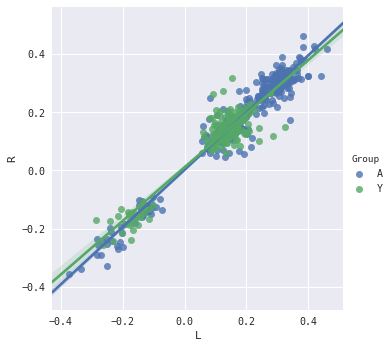

In [14]:
sns.lmplot(x='L', y='R', data=d_plot, hue='Group');

In [15]:
d_plot.groupby('Group').mean()

,L,R
Group,,
A,0.178871,0.177681
Y,0.116327,0.117777


Collapsing mice to correlation isn't a good choice because one mouse may have damaged left brain side and another right, which would cancel out.
This may be assessed with errors / stdev.

In [17]:
d_plot.groupby('Group').std()

,L,R
Group,,
A,0.136527,0.137690
Y,0.091673,0.090349


#### So... get those params that are out of sync for each group?

# regtest

In [18]:
#lr = select_columns_matching(d, ['LH', 'LF', 'RF', 'RH'])
lr =d
lr = lr.apply(scale)
lr.insert(0, 'group', md.Group)
lr_rand = rt.get_rand_data(lr.shape[0], 500)

In [19]:
lr.columns

Index(['group', 'FP_StepCycle_(s)_Mean', 'RF_StandIndex_Mean',
       'LF_StrideLength_(cm)_Mean', 'LH_BodySpeed_(cm/s)_Mean',
       'FP_SwingSpeed_(cm/s)_Mean', 'FP_Swing_(s)_Mean',
       'RH_StepCycle_(s)_Mean', 'RH_BodySpeedVariation_(%)_Mean',
       'RF_InitialDualStance_(s)_Mean', 'LH_MaxContactAt_(%)_Mean',
       'LH_BodySpeedVariation_(%)_Mean', 'LF_StepCycle_(s)_Mean',
       'LH_StrideLength_(cm)_Mean', 'RH_StrideLength_(cm)_Mean',
       'LF_DutyCycle_(%)_Mean', 'RF_SwingSpeed_(cm/s)_Mean',
       'RH_SingleStance_(s)_Mean', 'RF_SingleStance_(s)_Mean',
       'LF_BodySpeedVariation_(%)_Mean', 'FP_InitialDualStance_(s)_Mean',
       'FP_StrideLength_(cm)_Mean', 'RH_Stand_(s)_Mean', 'RH_StandIndex_Mean',
       'RF_DutyCycle_(%)_Mean', 'LF_StandIndex_Mean',
       'LH_InitialDualStance_(s)_Mean', 'RH_Swing_(s)_Mean',
       'LH_Swing_(s)_Mean', 'LH_SingleStance_(s)_Mean', 'LH_Stand_(s)_Mean',
       'FP_TerminalDualStance_(s)_Mean', 'RF_MaxContactAt_(%)_Mean',
       'RH_Ma

In [20]:
res_rand = rt.results(lr_rand, permute=False)
#res_acc = rt.results(d, permute=False)
res_lr = rt.results(lr, pairs='left-right')

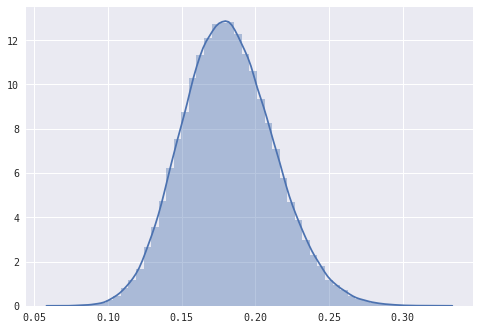

In [21]:
sns.distplot([i for i in res_rand['score']]);

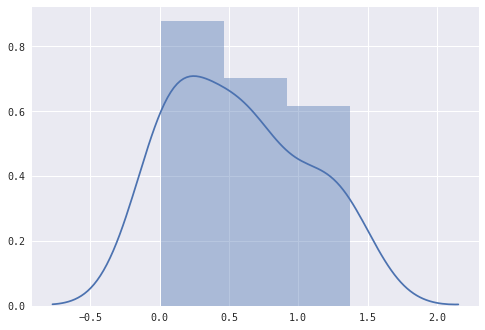

In [22]:
sns.distplot([i for i in res_lr['score']]);

In [23]:
nl = rt.get_least_linear(res_lr, res_rand, 0.999)
ml = rt.get_most_linear(res_lr, res_rand, n=10)

In [24]:
len(res_lr)

25

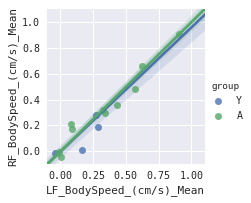

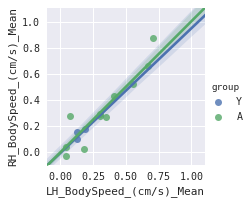

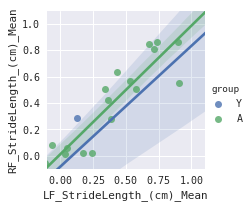

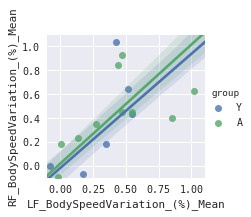

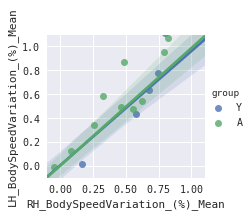

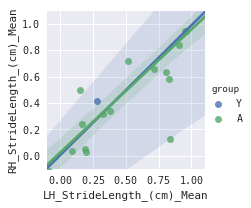

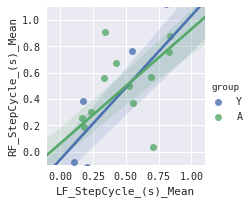

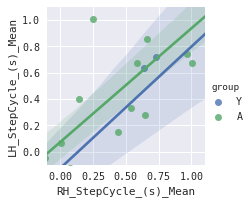

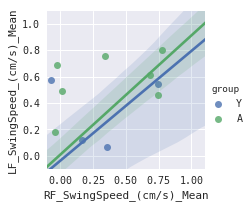

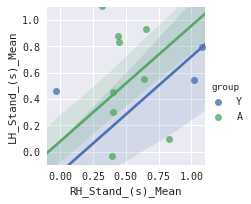

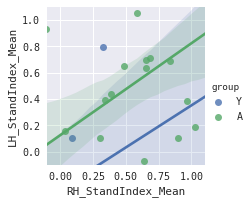

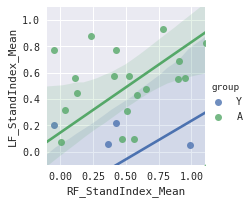

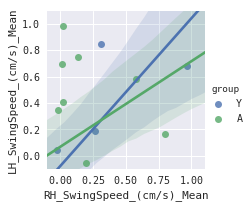

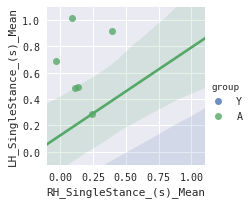

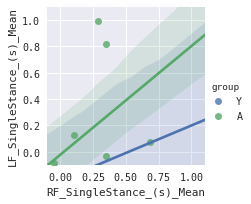

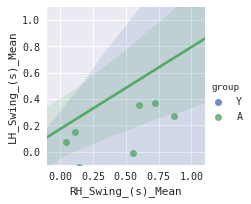

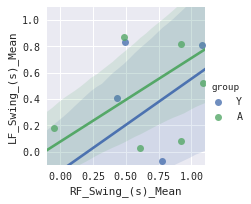

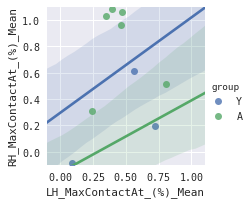

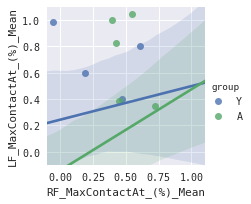

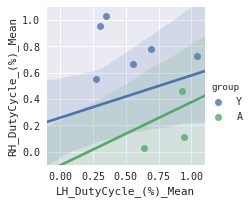

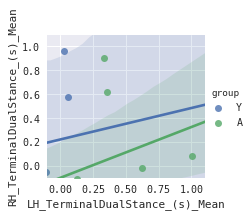

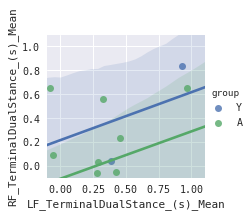

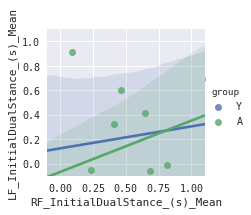

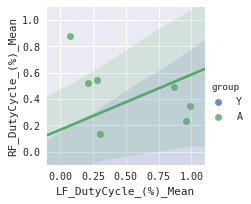

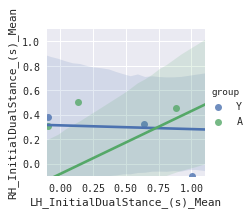

In [25]:
rt.plot_relationships_ipynb(res_lr['pair'], lr)

In [26]:
#rt.plot_relationships_ipynb(res_lr['pair'][20:], lr, n=20)

- comparison of which of those makes sense?
- some are pretty scattered. Pls data